# TP4
#### BROSSETTE Camille
#### LEGRAND Maxime

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from datetime import datetime

#### Latent Order Book

In [2]:
data_LOB = {}
data_LOB[1] = pd.read_pickle("./data4/sobs_info_720.h5")
data_LOB[2] = pd.read_pickle('./data4/sobs_info_1102.h5')
data_LOB[3] = pd.read_pickle('./data4/sobs_info_1662.h5')
data_LOB[4] = pd.read_pickle('./data4/sobs_info_1664.h5')
data_LOB[5] = pd.read_pickle('./data4/sobs_info_2255.h5')
data_LOB[6] = pd.read_pickle('./data4/sobs_info_2574.h5')
data_LOB[7] = pd.read_pickle('./data4/sobs_info_2586.h5')
data_LOB[8] = pd.read_pickle('./data4/sobs_info_5685.h5')
data_LOB[9] = pd.read_pickle('./data4/sobs_info_8695864.h5')

In [3]:
for i in range(1,10):
    dti = data_LOB[i]['ts_recv'].iloc[0]
    data_LOB[i] = data_LOB[i][(data_LOB[i]['ts_recv'] > datetime(dti.year, dti.month, dti.day, 8, 0))
                         &(data_LOB[i]['ts_recv'] < datetime(dti.year, dti.month, dti.day, 16, 30))]

In [4]:
LOB = {}
for i in range(1,10):
    LOB[i] = data_LOB[i].set_index('ts_recv')

#### Trades

In [55]:
dft = {}
dft[1] = pd.read_pickle("./data4/strades_info_720.h5")
dft[2] = pd.read_pickle('./data4/strades_info_1102.h5')
dft[3] = pd.read_pickle('./data4/strades_info_1662.h5')
dft[4] = pd.read_pickle('./data4/strades_info_1664.h5')
dft[5] = pd.read_pickle('./data4/strades_info_2255.h5')
dft[6] = pd.read_pickle('./data4/strades_info_2574.h5')
dft[7] = pd.read_pickle('./data4/strades_info_2586.h5')
dft[8] = pd.read_pickle('./data4/strades_info_5685.h5')
dft[9] = pd.read_pickle('./data4/strades_info_8695864.h5')

In [56]:
J=5

In [57]:
for i in range(1,10):
    dti = dft[i]['ts_market'].iloc[0]
    dft[i] = dft[i][(dft[i]['bid'] < dft[i]['ask'])
                    &(dft[i]['bid'] != 0)
                    &(dft[i]['bid'] != 999999)
                    &(dft[i]['ask'] != 0)
                    &(dft[i]['ask'] != 999999)
                    &(dft[i]['source'] == 'LSE')
                    &(dft[i]['volume'] != 0)
                    &(dft[i]['qty'] != 0)
                    &(dft[i]['side'] != 'U')]
    if i==2:
        dft[i] = dft[i][(dft[i]['ts_market'] > datetime(dti.year, dti.month, dti.day, 7, 0))
                         &(dft[i]['ts_market'] < datetime(dti.year, dti.month, dti.day, 15, 30))]
    else:
        dft[i] = dft[i][(dft[i]['ts_market'] > datetime(dti.year, dti.month, dti.day, 8, 0))
                         &(dft[i]['ts_market'] < datetime(dti.year, dti.month, dti.day, 16, 30))]

In [58]:
tick = [0.05, 0.05, 0.1, 0.01, 0.05, 0.1, 0.1, 0.1, 0.05]

In [59]:
for i in range(1,10):
    dft[i]['bid1']=dft[i]['bid']-tick[i-1]
    dft[i]['bid2']=dft[i]['bid']-2*tick[i-1]
    dft[i]['ask1']=dft[i]['ask']+tick[i-1]
    dft[i]['ask2']=dft[i]['ask']+2*tick[i-1]

In [60]:
trades = {}
for i in range(1,10):
    trades[i] = dft[i].set_index('ts_market')

## Passive Orders and Probability of Execution
### Probability of Execution

In [61]:
def Bid_proba_ex(Trades, Lob, time_step):
    Bid_dist = ['bid', 'bid1', 'bid2']
    
    Bid = np.array([Lob[Bid_dist[0]].resample(time_step, how='first'),
                    Lob[Bid_dist[1]].resample(time_step, how='first'),
                    Lob[Bid_dist[2]].resample(time_step, how='first')])
                    
    Trade = Trades['price'].resample(time_step, how='min')
    
    res = np.array([[(Trade[i]<Bid[0][i]) for i in range(len(Bid[0]))],
                   [(Trade[i]<Bid[1][i]) for i in range(len(Bid[1]))],
                   [(Trade[i]<Bid[2][i]) for i in range(len(Bid[2]))]])
    resf = np.array([res[0].mean(),
                     res[1].mean(),
                     res[2].mean()])
    
    return resf    

In [62]:
def Ask_proba_ex(Trades, Lob, time_step):
    Ask_dist = ['ask', 'ask1', 'ask2']
    
    Ask = np.array([Lob[Ask_dist[0]].resample(time_step, how='first'),
                    Lob[Ask_dist[1]].resample(time_step, how='first'),
                    Lob[Ask_dist[2]].resample(time_step, how='first')])
                    
    Trade = Trades['price'].resample(time_step, how='max')
    
    res = np.array([[(Trade[i]>Ask[0][i]) for i in range(len(Ask[0]))],
                   [(Trade[i]>Ask[1][i]) for i in range(len(Ask[1]))],
                   [(Trade[i]>Ask[2][i]) for i in range(len(Ask[2]))]])
    resf = np.array([res[0].mean(),
                     res[1].mean(),
                     res[2].mean()])
    
    return resf

In [63]:
J=1
t0=30
T=150
dt=30

In [64]:
P_Bid = {}
for s in range(t0,T,dt):
    P_Bid[s] = Bid_proba_ex(trades[J], trades[J], (str(s) + 's'))

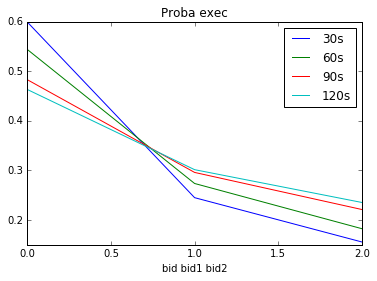

In [65]:
for s in range(t0,T,dt):
    plt.plot(P_Bid[s]/P_Bid[s].sum(), label = (str(s) + 's'))
    
plt.title('Proba exec')
plt.xlabel('bid bid1 bid2')
plt.legend()

plt.show()


ç doit se rapprocher d'une exp qd le pas tend vers 0..

In [66]:
P_Ask = {}
for s in range(t0,T,dt):
    P_Ask[s] = Ask_proba_ex(trades[J], trades[J], (str(s) + 's'))

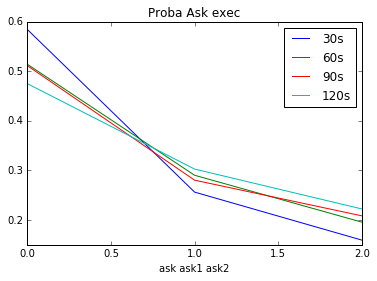

In [67]:
for s in range(t0,T,dt):
    plt.plot(P_Ask[s]/P_Ask[s].sum(), label = (str(s) + 's'))
    
plt.title('Proba Ask exec')
plt.xlabel('ask ask1 ask2')
plt.legend()

plt.show()


en ayant suivit les instructions du mail , c'est beaucoup mieux !!! on oublie donc les données LOB! 

je changerai la def de la focntion si on garde cette methode .

our l'instant j'ai juste changé l'argument LOB <- Trades


# Fillrate

In [68]:
dft[1].head(5)

,provider,source,ts_market,qty,price,side,type,volume,bid_size,bid,ask,ask_size,cmp_name,bid1,bid2,ask1,ask2
10,NOMURA,LSE,2014-11-05 08:00:11.066,3179970,207.00,?,,3179970,12028,207.00,207.05,7500,Vodafone Group PLC,206.95,206.90,207.10,207.15
65,NOMURA,LSE,2014-11-05 08:00:12.282,4704,207.00,A,,3184674,5284,206.65,207.00,26067,Vodafone Group PLC,206.60,206.55,207.05,207.10
78,NOMURA,LSE,2014-11-05 08:00:12.283,4000,206.55,B,,3188674,4000,206.55,207.00,15296,Vodafone Group PLC,206.50,206.45,207.05,207.10
80,NOMURA,LSE,2014-11-05 08:00:12.718,3744,206.95,A,,3192418,5284,206.35,206.95,5753,Vodafone Group PLC,206.30,206.25,207.00,207.05
81,NOMURA,LSE,2014-11-05 08:00:12.718,2009,206.95,A,,3194427,5284,206.35,206.95,2009,Vodafone Group PLC,206.30,206.25,207.00,207.05


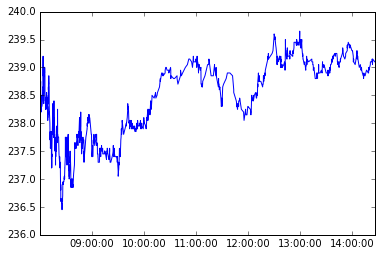

In [69]:
dti = dft[5]['ts_market'].iloc[0]
tt = dft[5][(dft[5]['ts_market'] > datetime(dti.year, dti.month, dti.day, 8, 0))
                         &(dft[i]['ts_market'] < datetime(dti.year, dti.month, dti.day, 14, 30))]
test = tt.set_index('ts_market')
plt.plot(test['price'])

In [141]:
def Fillrate(Trades, dist, time_step, time_waiting):
    Bid_dist = ['bid', 'bid1', 'bid2']
    Bid = Trades[Bid_dist[dist]].resample(time_step, how = 'first')
    Trade = Trades['price'].resample(time_step, how = 'min')
    
    Res = Trade
    for i in range(len(Bid)):
        Res[i] = (Trade[i]<Bid[i])
    
    res = Res.resample(time_waiting, how = 'sum')    
    
    return res

en fait si on insere un ordre on change la dynamique du carnet d'irdre, du coup on ne sait plus ce qu'il se passe... on va faire semblant de ne pas le modifier en 'insérant" des petis ordres. on veut savoir si notre ordre aurait été consommé en le mettant dans une file d'attente pendant une periode de temps.

le fillrate cherche à savoir combien d'ordres on peut mettre et se faire consommer 

In [169]:
J=1 #choix de l'asset
Waiting_time = ['30s', '1Min', '2Min']
dt = '1s'
distance = 1

fillrate = {}
time = {}
price = {}

for t in range(len(Waiting_time)):
    fillrate[t] = Fillrate(trades[J], distance, dt, Waiting_time[t])
    time[t] =  np.linspace(8,16.5,len(fillrate[t]))
    price[t] = trades[J]['price'].resample( Waiting_time[t], how = 'min')

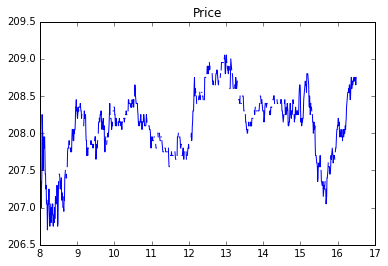

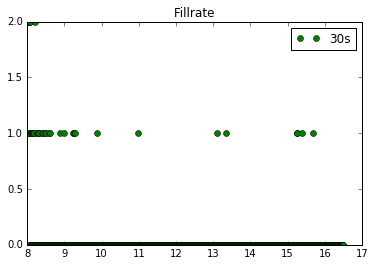

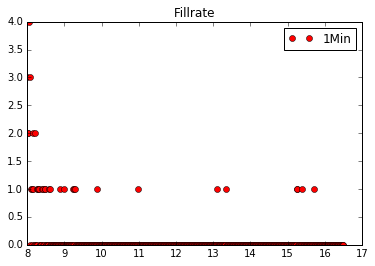

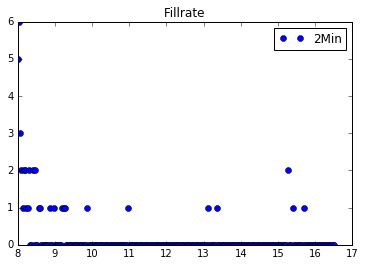

In [170]:
plt.plot(time[0], price[0], color='blue')
plt.title('Price')
plt.show()

color = ['green', 'red', 'blue']
for t in range(len(Waiting_time)):
    plt.plot( time[t], fillrate[t], 'o', label=Waiting_time[t], color=color[t])
    plt.title('Fillrate')
    plt.legend()
    plt.show()
